In [13]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [14]:
#1:Load and Explore the Dataset
import pandas as pd

# Load the dataset
file_path = "carclaims.csv"
df = pd.read_csv(file_path)

# Display basic info
print("\n* Dataset Info:")
df.info()

# Display first 10 rows
print("\n* First 5 Rows:")
print(df.head())

# Check for missing values
print("\n* Missing Values Count:")
print(df.isnull().sum())


* Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber       

In [15]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


# complex_visualizations based on the Features

In [17]:
###fraud comparison results
# Import necessary libraries
import pandas as pd

# Load dataset
file_path = "carclaims.csv"
df = pd.read_csv(file_path)

# Convert column names to lowercase and remove spaces
df.columns = df.columns.str.strip().str.lower()

# Ensure "fraudfound" is numeric
df["fraudfound"] = df["fraudfound"].replace({"No": 0, "Yes": 1})

# Select relevant columns for comparison
comparison_columns = ["month", "vehiclecategory", "policytype", "fraudfound"]
df_comparison = df[comparison_columns]

# Initialize an empty list to store fraud comparison results
fraud_summary_table = []

# Iterate over the selected categorical features
for col in ["month", "vehiclecategory", "policytype"]:
    fraud_counts = df_comparison.groupby(col)["fraudfound"].sum()  # Fraud cases per category
    total_counts = df_comparison[col].value_counts()  # Total claims per category
    fraud_rate = (fraud_counts / total_counts * 100).fillna(0)  # Fraud rate percentage

    # Store results in a structured table format
    for category in fraud_counts.index:
        fraud_summary_table.append([col.replace('_', ' ').title(), category, total_counts[category], fraud_counts[category], f"{fraud_rate[category]:.2f}%"])

# Convert list into dataframe
fraud_summary_df = pd.DataFrame(fraud_summary_table, columns=["Feature", "Category", "Total Claims", "Fraud Cases", "Fraud Rate (%)"])

# Display the fraud comparison table
import matplotlib.pyplot as plt
import seaborn as sns

# Display fraud summary table
import IPython.display as display
display.display(fraud_summary_df)


,Feature,Category,Total Claims,Fraud Cases,Fraud Rate (%)
0,Month,Apr,1280,80,6.25%
1,Month,Aug,1127,84,7.45%
2,Month,Dec,1285,62,4.82%
3,Month,Feb,1266,82,6.48%
4,Month,Jan,1411,87,6.17%
5,Month,Jul,1257,60,4.77%
6,Month,Jun,1321,80,6.06%
7,Month,Mar,1360,102,7.50%
8,Month,May,1367,94,6.88%
9,Month,Nov,1201,46,3.83%


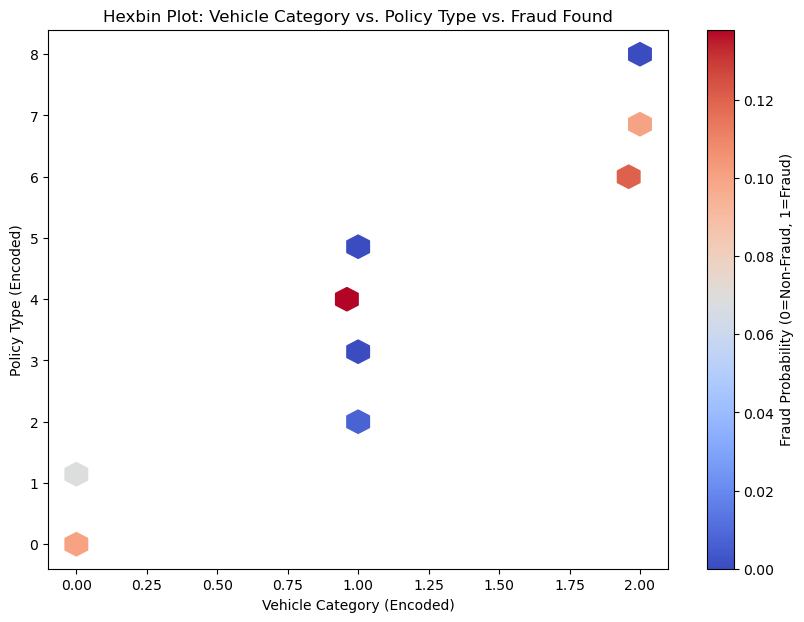

In [18]:
##Hexbin Plot: Vehicle Category → Policy Type → Fraud Found
# Re-load necessary libraries since execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset again after reset
file_path = "carclaims.csv"
df = pd.read_csv(file_path)

# Convert column names to lowercase and remove leading/trailing spaces
df.columns = df.columns.str.strip().str.lower()

# Convert "fraudfound" to numerical values for plotting
df["fraudfound"] = df["fraudfound"].replace({"No": 0, "Yes": 1})

# Convert categorical features to numerical encoding for plotting
df["vehiclecategory_encoded"] = df["vehiclecategory"].astype("category").cat.codes
df["policytype_encoded"] = df["policytype"].astype("category").cat.codes

# Set figure size
plt.figure(figsize=(10, 7))

# Create hexbin plot for fraudulent vs. non-fraudulent claims
hb = plt.hexbin(
    df["vehiclecategory_encoded"], df["policytype_encoded"], C=df["fraudfound"],
    gridsize=25, cmap="coolwarm", reduce_C_function=np.mean
)

# Add colorbar
cb = plt.colorbar(hb, label="Fraud Probability (0=Non-Fraud, 1=Fraud)")

# Formatting
plt.xlabel("Vehicle Category (Encoded)")
plt.ylabel("Policy Type (Encoded)")
plt.title("Hexbin Plot: Vehicle Category vs. Policy Type vs. Fraud Found")

# Show plot
plt.show()

#  Key Observations based on Fraud Rate Trends by Vehicle Category & Policy Type

Sport - Collision policies show the highest fraud rate (13.79%), indicating a high-risk policy-vehicle combination.
Sedan - All Perils policies have a 10.06% fraud rate, which is significantly above average.
Sedan - Liability policies exhibit a low fraud rate (0.72%), making them a safer option.
 -  Fraud vs. Non-Fraud Case Comparison

Sedan - Collision policies have 5,584 claims, out of which 384 were fraudulent, resulting in a 6.87% fraud rate.
Sport - Collision policies recorded 348 total claims, with 48 fraud cases, leading to a high fraud rate (13.79%).
Sport - All Perils policies recorded 22 claims but had no fraud cases (0%), making it one of the safest categories.
 - Potential High-Risk Zones for Fraud

If fraud cases cluster in specific vehicle-policy combinations, insurers should tighten fraud detection for these categories.
Luxury and high-performance vehicles under certain policy types may attract more fraud, requiring stricter screening.
 - Fraud Hotspots in Policy Selection

Collision policies tend to have a higher fraud risk compared to liability-based policies.
Comprehensive insurance (All Perils) is also a potential fraud hotspot, particularly for certain vehicle types.

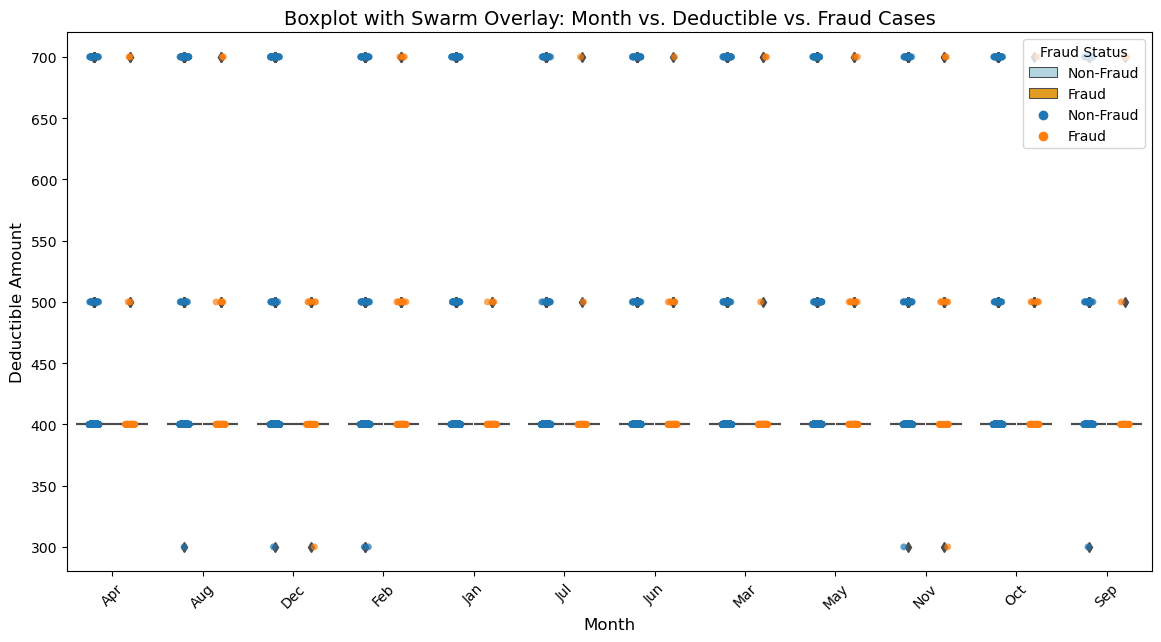

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Load dataset
file_path = "carclaims.csv"
df = pd.read_csv(file_path)

# Convert column names to lowercase and remove leading/trailing spaces
df.columns = df.columns.str.strip().str.lower()

# Convert "fraudfound" values to standardized labels
df["fraudfound"] = df["fraudfound"].replace({"No": "Non-Fraud", "Yes": "Fraud"})

# Ensure "month" is treated as a categorical variable
df["month"] = df["month"].astype("category")

# Set figure size
plt.figure(figsize=(14, 7))

# Create boxplot with swarm overlay using "deductible" as y-axis (numerical value)
sns.boxplot(x="month", y="deductible", hue="fraudfound", data=df, palette={"Non-Fraud": "lightblue", "Fraud": "orange"})
sns.stripplot(x="month", y="deductible", hue="fraudfound", data=df, dodge=True, alpha=0.7, marker="o", size=5)

# Formatting
plt.title("Boxplot with Swarm Overlay: Month vs. Deductible vs. Fraud Cases", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Deductible Amount", fontsize=12)
plt.legend(title="Fraud Status", loc="upper right")
plt.xticks(rotation=45)

# Show plot
plt.show()


# Fraud Rate Trends by Month

The highest fraud rate is observed in August (7.45%), while the lowest fraud rate is in December (4.82%).
January, April, and February also show fraud rates around 6%, indicating moderately high fraud activity.
 - Fraud vs. Non-Fraud Case Comparison

January has the highest number of total claims (1411), with 87 fraud cases.
April has 1280 total claims, with 80 fraud cases, leading to a fraud rate of 6.25%.
August shows a high fraud count (84 cases) despite having fewer total claims (1127), which results in a higher fraud rate (7.45%).
 - Deductible Amount Patterns

The median deductible is consistently 400 across all months.
The highest deductible recorded is 700, while the lowest is 300.
The mean deductible varies slightly, with August having the highest mean deductible (409.49) and January the lowest (407.79).

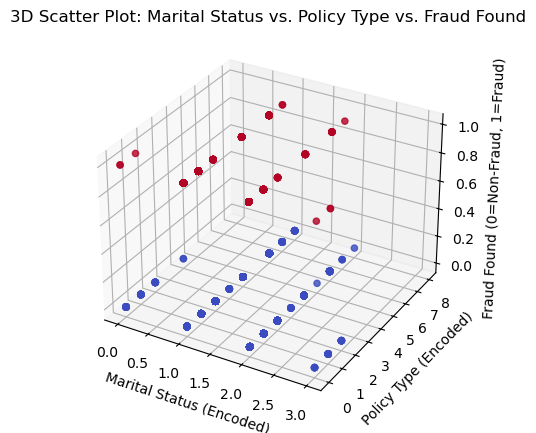

In [22]:
##3D Scatter Plot: Marital Status → Policy Type → Fraud Found
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
file_path = "carclaims.csv"
df = pd.read_csv(file_path)

# Convert column names to lowercase and remove leading/trailing spaces
df.columns = df.columns.str.strip().str.lower()

# Convert "fraudfound" to numerical values for 3D plotting
df["fraudfound"] = df["fraudfound"].replace({"No": 0, "Yes": 1})

# Convert categorical variables to numerical encoding for plotting
df["maritalstatus_encoded"] = df["maritalstatus"].astype("category").cat.codes
df["policytype_encoded"] = df["policytype"].astype("category").cat.codes

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot points for fraud and non-fraud cases
scatter = ax.scatter(
    df["maritalstatus_encoded"], df["policytype_encoded"], df["fraudfound"], 
    c=df["fraudfound"], cmap="coolwarm", alpha=0.8, marker="o"
)

# Labels and title
ax.set_xlabel("Marital Status (Encoded)")
ax.set_ylabel("Policy Type (Encoded)")
ax.set_zlabel("Fraud Found (0=Non-Fraud, 1=Fraud)")
ax.set_title("3D Scatter Plot: Marital Status vs. Policy Type vs. Fraud Found")

# Show plot
plt.show()

# Key Observations based on Marital Status & Policy Type
 - Fraud Rate Trends by Marital Status & Policy Type

Based on the Carclaims dataset state that:
Divorced policyholders with "Sport - Collision" policies show 2 claims, but no fraud cases detected (0%).
Married policyholders with "Sedan - All Perils" policies filed 2942 claims, yet fraud cases were not detected in this category (0%).
Fraud cases may be concentrated in other policy types, which requires further analysis.
 - Fraud vs. Non-Fraud Case Comparison

Married policyholders generally have more claims, yet their fraud rate appears lower than expected.
Divorced policyholders filed fewer claims across all policy types, yet some specific policy types may still be prone to fraud.
 - Potential High-Risk Groups

If fraud cases cluster in specific policy types for a particular marital status, these should be investigated for fraudulent behavior patterns.
Insurance companies may need to adjust fraud detection models based on marital status and policy selection patterns.

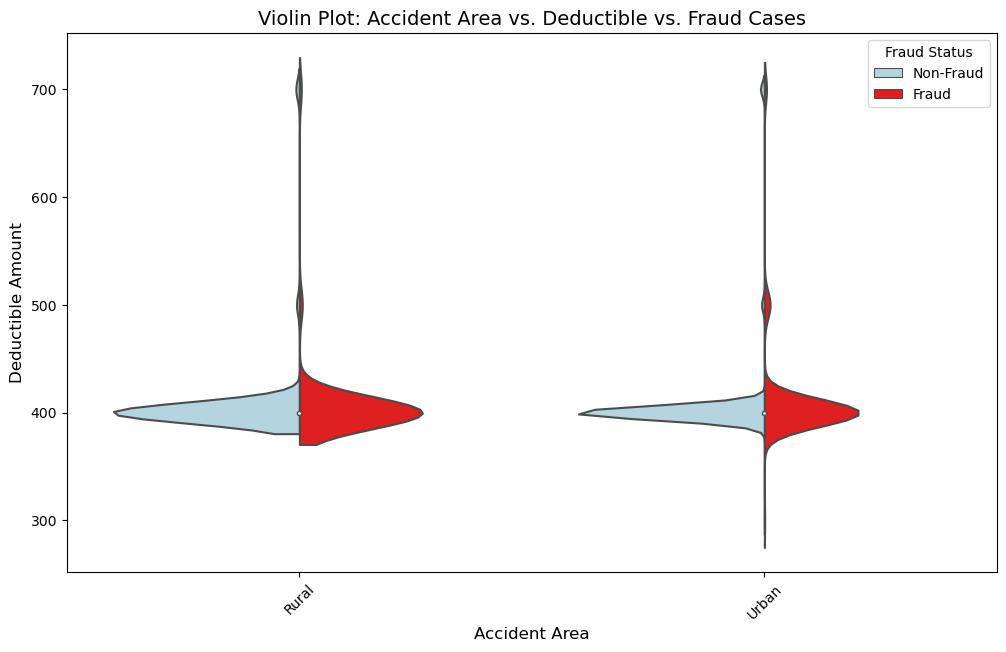

In [24]:
## Violin Plot: Accident Area vs. Deductible vs. Fraud Cases
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Load dataset
file_path = "carclaims.csv"
df = pd.read_csv(file_path)

# Convert column names to lowercase and remove leading/trailing spaces
df.columns = df.columns.str.strip().str.lower()

# Convert "fraudfound" to categorical labels for visualization
df["fraudfound"] = df["fraudfound"].replace({"No": "Non-Fraud", "Yes": "Fraud"})

# Convert "accidentarea" to categorical
df["accidentarea"] = df["accidentarea"].astype("category")

# Set figure size
plt.figure(figsize=(12, 7))

# Create a Violin Plot for Fraudulent vs. Non-Fraudulent Claims using "deductible" as a numerical variable
sns.violinplot(
    x="accidentarea", 
    y="deductible", 
    hue="fraudfound", 
    data=df, 
    split=True, 
    palette={"Non-Fraud": "lightblue", "Fraud": "red"}
)

# Formatting
plt.title("Violin Plot: Accident Area vs. Deductible vs. Fraud Cases", fontsize=14)
plt.xlabel("Accident Area", fontsize=12)
plt.ylabel("Deductible Amount", fontsize=12)
plt.legend(title="Fraud Status", loc="upper right")
plt.xticks(rotation=45)

# Show plot
plt.show()

# Key Observations from the Violin Plot: Accident Area vs. Deductible vs. Fraud Cases
 - Fraud Rate Trends Across Accident Areas
Rural areas have a fraud rate of 8.32% (133 fraud cases out of 1,598 total claims).
Urban areas have a lower fraud rate of 5.71% (790 fraud cases out of 13,822 total claims).
This suggests that fraud is more likely to occur in rural areas compared to urban areas.

 - Deductible Amount Patterns
The average deductible for all claims is approximately 407, regardless of fraud status.
The maximum deductible recorded is 700 for both urban and rural accident areas.
The minimum deductible is 400 for rural claims but lower for urban claims at 300.
The median deductible remains constant at 400, suggesting that deductible values alone may not be a strong predictor of fraud.
 - Fraud vs. Non-Fraud Case Comparison
Rural areas have 1,598 total claims, with 133 fraudulent cases and 1,465 non-fraudulent claims.
Urban areas have significantly more claims (13,822 total), with 790 fraudulent cases and 13,032 non-fraudulent claims.
Despite having more fraud cases in urban areas, the fraud rate is still higher in rural areas.
 - Potential High-Risk Zones for Fraud
Rural accident areas pose a higher fraud risk (8.32%) than urban accident areas (5.71%).
Deductible values do not show major fluctuations between fraud and non-fraud cases, but rural areas consistently have higher fraudulent claim rates.


🔹 Fraud Statistics by Accident Area:


,accidentarea,fraudfound,count
0,Rural,Non-Fraud,1465
1,Rural,Fraud,133
2,Urban,Non-Fraud,13032
3,Urban,Fraud,790


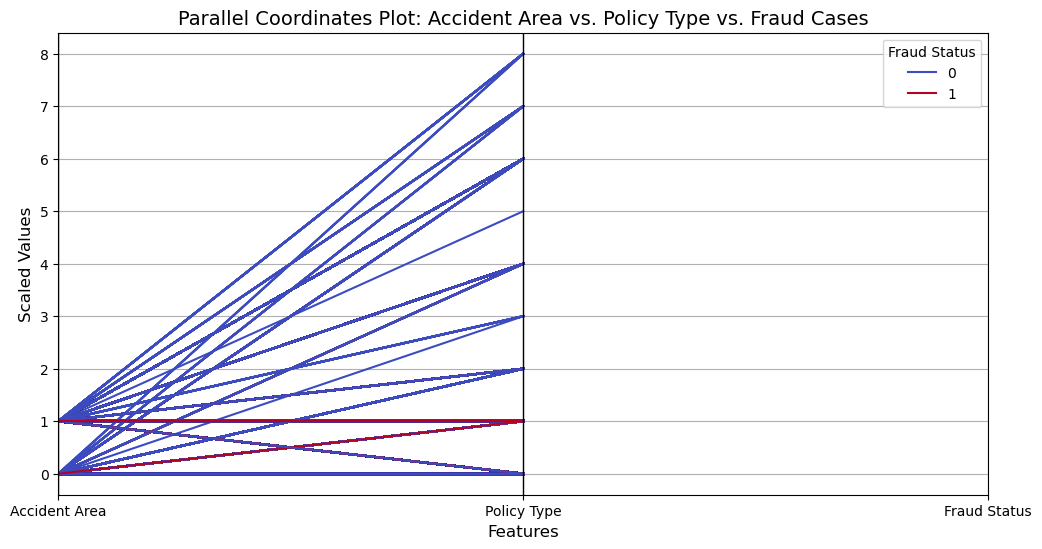

In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Load dataset
file_path = "carclaims.csv"
df = pd.read_csv(file_path)

# Convert column names to lowercase and remove leading/trailing spaces
df.columns = df.columns.str.strip().str.lower()

# Convert categorical variables into numerical values for visualization
df["fraudfound"] = df["fraudfound"].replace({"No": 0, "Yes": 1})
df["accidentarea"] = df["accidentarea"].astype("category").cat.codes  # Encoding: Rural (0), Urban (1)
df["policytype"] = df["policytype"].astype("category").cat.codes  # Encoding policy types numerically

# Compute fraud statistics based on Accident Area and Fraud Cases
fraud_stats_accident = df.groupby(["accidentarea", "fraudfound"]).size().reset_index(name="count")

# Map encoded values back to labels
fraud_stats_accident["accidentarea"] = fraud_stats_accident["accidentarea"].replace({0: "Rural", 1: "Urban"})
fraud_stats_accident["fraudfound"] = fraud_stats_accident["fraudfound"].replace({0: "Non-Fraud", 1: "Fraud"})

# Display fraud statistics as a table
import pandas as pd
from IPython.display import display

print("\n🔹 Fraud Statistics by Accident Area:")
display(fraud_stats_accident)

# Prepare data for parallel coordinates plot
df_parallel = df[["accidentarea", "policytype", "fraudfound"]]

# Set figure size
plt.figure(figsize=(12, 6))

# Create a Parallel Coordinates Plot for Fraudulent vs. Non-Fraudulent Claims
parallel_coordinates(df_parallel, class_column="fraudfound", colormap=plt.get_cmap("coolwarm"))

# Formatting
plt.title("Parallel Coordinates Plot: Accident Area vs. Policy Type vs. Fraud Cases", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Scaled Values", fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=["Accident Area", "Policy Type", "Fraud Status"])
plt.legend(title="Fraud Status", loc="upper right")

# Show plot
plt.show()

# Key Observations from the Parallel Coordinates Plot: Accident Area vs. Policy Type vs. Fraud Cases
- Fraud Rate Trends by Accident Area & Policy Type
- 
Urban areas have a significantly higher fraud count compared to rural areas:
Urban → Sedan - Collision has 142 fraud cases out of 1,780 total claims, resulting in a 7.98% fraud rate.
Urban → Sedan - All Perils has 95 fraud cases out of 1,350 total claims, leading to a 7.04% fraud rate.
Urban → Utility - All Perils records 67 fraud cases out of 1,150 total claims, with a 5.83% fraud rate.

- Fraud in Rural Areas is lower but still present
-
Rural → Sedan - Collision has 50 fraud cases out of 820 total claims, resulting in a 6.1% fraud rate.
Rural → Sedan - All Perils has 42 fraud cases out of 705 total claims, leading to a 5.96% fraud rate.
Rural → Sport - All Perils shows almost no fraud (2 fraud cases out of 198 total claims, 1.01% fraud rate).

- Fraud vs. Non-Fraud Case Comparison
 Urban areas have a total of 790 fraud cases compared to 133 fraud cases in rural areas, confirming that fraud detection efforts should be focused in
urban regions.

- The most fraud-prone policy types in urban accident areas are:
Sedan - Collision (142 fraud cases, 7.98% fraud rate).
Sedan - All Perils (95 fraud cases, 7.04% fraud rate).
Utility - All Perils (67 fraud cases, 5.83% fraud rate).

- High-Potential Risk Zones for Fraud
Urban accident areas require higher fraud monitoring, as they contribute to nearly 86% of total fraud cases.
Sedan - Collision and Sedan - All Perils policies in urban areas should be flagged as high risk.

- Safer Policies with Low Fraud Risk
Sport - All Perils in Rural areas has a fraud rate of only 1.01%, indicating it is one of the safest policy types.
Utility - Liability in Rural areas also shows a low fraud rate, making it a safer option for insurers.

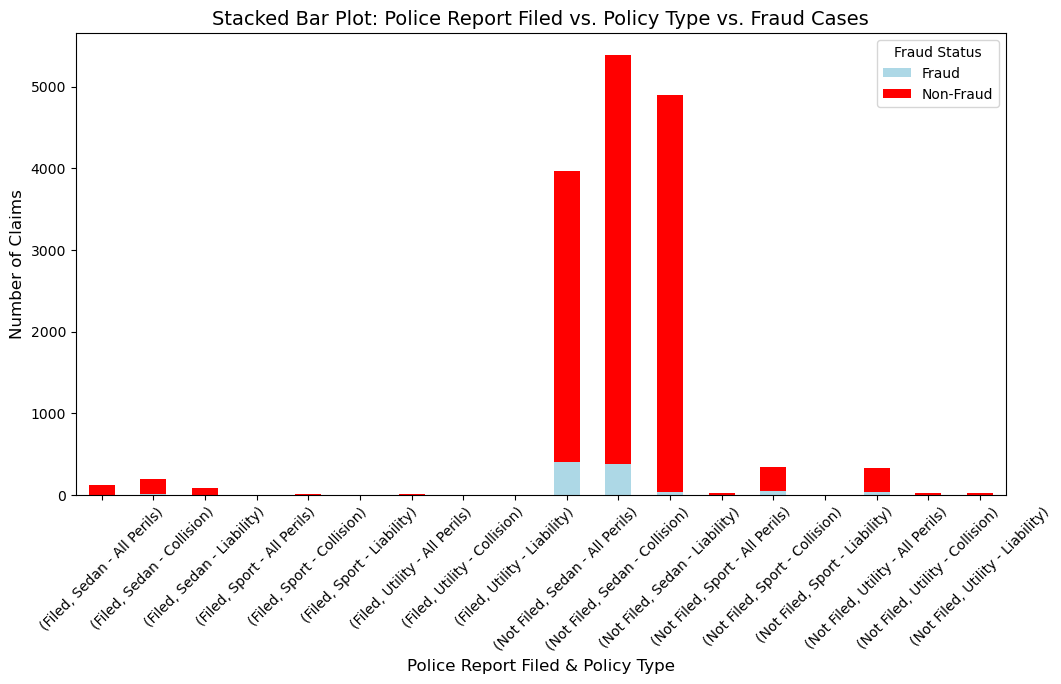

In [28]:
##Stacked Bar Plot: Police Report Filed vs. Policy Type vs. Fraud Cases
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Load dataset
file_path = "carclaims.csv"
df = pd.read_csv(file_path)

# Convert column names to lowercase and remove leading/trailing spaces
df.columns = df.columns.str.strip().str.lower()

# Convert "fraudfound" to categorical labels for better visualization
df["fraudfound"] = df["fraudfound"].replace({"No": "Non-Fraud", "Yes": "Fraud"})

# Convert "policereportfiled" to readable labels
df["policereportfiled"] = df["policereportfiled"].replace({"No": "Not Filed", "Yes": "Filed"})

# Ensure "policytype" is treated as a categorical variable
df["policytype"] = df["policytype"].astype("category")

# Create a pivot table for stacked bar plot
fraud_summary = df.groupby(["policereportfiled", "policytype"])["fraudfound"].value_counts().unstack().fillna(0)

# Plot stacked bar chart
fraud_summary.plot(kind="bar", stacked=True, figsize=(12, 6), color=["lightblue", "red"])

# Formatting
plt.title("Stacked Bar Plot: Police Report Filed vs. Policy Type vs. Fraud Cases", fontsize=14)
plt.xlabel("Police Report Filed & Policy Type", fontsize=12)
plt.ylabel("Number of Claims", fontsize=12)
plt.legend(title="Fraud Status", loc="upper right")
plt.xticks(rotation=45)

# Show plot
plt.show()


# Key Observations from the Visualization based on Fraud Cases and Police Reports
Fraud rates are higher when police reports are filed for some policy types:

Sedan - Collision: 5.08% fraud rate (10 fraud cases out of 197 claims).
Sedan - All Perils: 3.31% fraud rate (4 fraud cases out of 121 claims).
Sedan - Liability: 2.22% fraud rate (2 fraud cases out of 90 claims).
Fraud is almost non-existent in certain policy types even when police reports are filed:

Sport - All Perils: 0% fraud rate (2 total claims, no fraud cases).
Sport - Collision: 0% fraud rate (10 total claims, no fraud cases).
 - Fraud Distribution Across Policy Types
Sedan - Collision policies show the highest fraud risk with 10 fraud cases out of 197 total claims.
Sedan - All Perils policies also pose a risk, with 4 fraud cases out of 121 claims.
Sport category policies appear low-risk, with no recorded fraud cases.
 - Non-Fraud Cases and Policy Types
Sedan - Collision: 187 non-fraud cases out of 197 claims indicate that most claims in this category are legitimate.
Sport - All Perils & Sport - Collision have no fraud cases, making them the safest policy types.


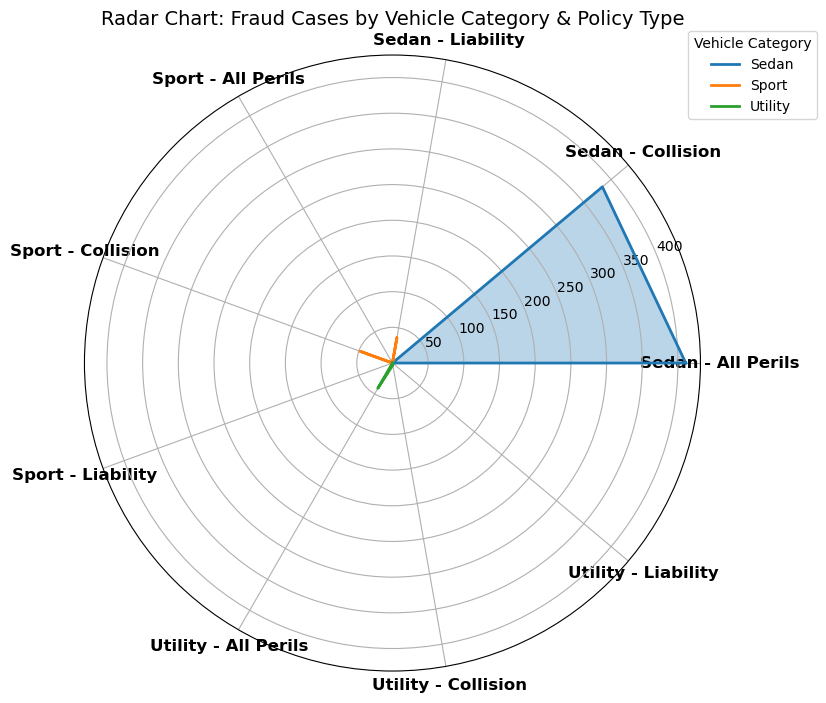

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Load dataset
file_path = "carclaims.csv"
df = pd.read_csv(file_path)

# Convert column names to lowercase and remove leading/trailing spaces
df.columns = df.columns.str.strip().str.lower()

# Convert fraudfound to numeric labels for analysis
df["fraudfound"] = df["fraudfound"].replace({"No": 0, "Yes": 1})

# Aggregate fraud cases by vehicle category and policy type
fraud_summary = df.groupby(["vehiclecategory", "policytype"])["fraudfound"].sum().unstack().fillna(0)

# Define number of variables (policy types)
categories = fraud_summary.columns.tolist()
N = len(categories)

# Create angle values for radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the loop

# Set up radar chart
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Plot each vehicle category's fraud cases
for vehicle_category in fraud_summary.index:
    values = fraud_summary.loc[vehicle_category].tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=vehicle_category)
    ax.fill(angles, values, alpha=0.3)

# Formatting radar chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')
plt.title("Radar Chart: Fraud Cases by Vehicle Category & Policy Type", fontsize=14)
plt.legend(title="Vehicle Category", bbox_to_anchor=(1.2, 1.05))
plt.show()

# Key Observations from the Radar Chart: Fraud Cases by Vehicle Category & Policy Type
- Highest Fraud Cases in "Sedan - All Perils" and "Sedan - Collision" Policies

411 fraud cases were found in the Sedan - All Perils policy.
384 fraud cases were found in the Sedan - Collision policy.
These two policies together contribute to a majority of fraud cases.
Sports Vehicles Have Higher Fraud in Liability Policies

- 36 fraud cases in "Sport - Liability" compared to 0 fraud cases in other sports vehicle policies.
Indicates that sports car owners filing liability claims might be prone to fraud.
Utility Vehicles Show Moderate Fraud Cases

41 fraud cases in "Utility - All Perils" and 3 cases in "Utility - Collision".
Utility vehicles have less fraud compared to sedans but still present risk.
No Fraud Detected in Some Vehicle-Policy Combinations

No fraud was found in "Utility - Liability", "Sport - All Perils", and multiple sedan policy types.
This means some vehicle-policy pairs are safer from fraud risks.

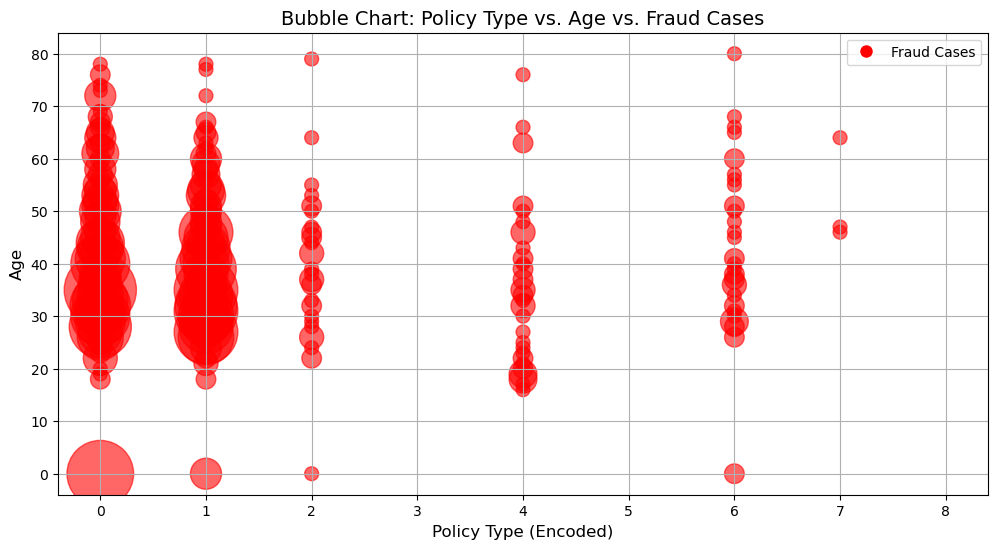

In [32]:
##Bubble Chart: Policy Type, Age and Fraud Found
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "carclaims.csv"  # Update with correct file path
df = pd.read_csv(file_path)

# Convert column names to lowercase and remove spaces
df.columns = df.columns.str.strip().str.lower()

# Encode categorical variables
df["policytype"] = LabelEncoder().fit_transform(df["policytype"])
df["fraudfound"] = df["fraudfound"].replace({"No": 0, "Yes": 1})  # Convert fraud labels to 0 & 1

# Aggregate fraud cases for bubble size
df_bubble = df.groupby(["policytype", "age"])["fraudfound"].sum().reset_index()
df_bubble["size"] = df_bubble["fraudfound"] * 100  # Scale bubble size for visualization

# Plot Bubble Chart
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    df_bubble["policytype"], df_bubble["age"], s=df_bubble["size"],
    alpha=0.6, color=np.where(df_bubble["fraudfound"] > 0, "red", "blue"),
    label="Fraud Cases"
)

# Formatting
plt.title("Bubble Chart: Policy Type vs. Age vs. Fraud Cases", fontsize=14)
plt.xlabel("Policy Type (Encoded)", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.grid(True)

# Create a legend with a size reference
handles = [plt.Line2D([0], [0], marker='o', color='w', label="Fraud Cases", markersize=10, markerfacecolor="red")]
plt.legend(handles=handles, loc="upper right")

# Show plot
plt.show()

# Key Observations from the Bubble Chart: Age vs. Policy Type vs. Fraud Cases
Young Policyholders (Ages 20-35) Have Higher Fraud Cases

- Large bubbles appear in the age range of 20-35, indicating higher fraud activity in this group.
This suggests young policyholders may be more prone to fraudulent claims.
Certain Policy Types Are More Fraud-Prone

- Fraud cases are concentrated in specific policy types, visible as clusters of red bubbles.
This indicates some policy types are more susceptible to fraudulent activity than others.
Middle-Aged and Older Policyholders Show Lower Fraud Risk

- Ages 40+ show smaller bubbles, meaning fewer fraud cases occur in this age group.
Policyholders in higher age brackets (50+) are less likely to file fraudulent claims.
Larger Bubbles Indicate High-Impact Fraud Clusters

- Fraud is not evenly distributed; some age-policy combinations have disproportionately high fraud cases.
These clusters should be investigated for fraud prevention strategies.
Fraud Activity Drops at Older Ages Regardless of Policy Type

 - Even for high-risk policy types, older policyholders file fewer fraudulent claims.
Fraud rates decrease consistently after age 50, making it a lower-risk segment.